In [142]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer
import scipy as sp
from scipy import stats

# Loading Dataset

In [143]:
url = 'https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/W4%20Gen%20AI/W4D3/Airplane%20Crashes%20and%20Fatalities%20upto%202023.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [144]:
# Load Dataset into Pandas Dataframe
df = pd.read_csv(r'C:\Repositories\DI-Bootcamp\Week10\Day6\DailyChallenge\data\Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin-1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


# Initial Exploration and Understanding

In [145]:
# Shape and Data Types
print("Number of Rows, Columns:", df.shape)
df.info()

Number of Rows, Columns: (4998, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew     

In [146]:
# Inital Look at Distribution
# Separate Numeric and Categorical Columns
df_numeric = df.select_dtypes(include=['float64','int64'])
df_categorical = df.drop(columns=df_numeric.columns)

# Distribution of Numeric Columns
df_numeric.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [147]:
# Finding Duplicate Rows:
duplicates = df[df.duplicated()]

# Finding the number of duplicates:
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

# Quick Check of Missing Values
print("Missing Values Per Column:\n", df.isna().sum().sort_values(ascending=False))


Number of Duplicate Rows: 0
Missing Values Per Column:
 Flight #                 3669
Time                     1512
Route                     777
cn/ln                     668
Registration              274
Fatalities Passangers     242
Fatalities Crew           241
Aboard Passangers         229
Aboard Crew               226
Summary                    64
Ground                     42
Aboard                     18
AC Type                    15
Operator                   10
Fatalities                  8
Location                    4
Date                        0
dtype: int64


In [148]:
# Overview of Categorical Data:
for col in df:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))


Value counts for Date:
Date
8/31/1988     4
9/11/2001     4
4/2/1969      3
2/23/1945     3
9/17/1929     3
             ..
11/21/2022    1
1/15/2023     1
9/16/2023     1
10/29/2023    1
9/3/1915      1
Name: count, Length: 4570, dtype: int64

Value counts for Time:
Time
NaN      1512
15:00      38
17:00      33
14:00      32
11:00      32
         ... 
7:29        1
2:53        1
6:31        1
17:31       1
12:16       1
Name: count, Length: 1061, dtype: int64

Value counts for Location:
Location
Moscow, Russia             17
Manila, Philippines        15
New York, New York         14
Cairo, Egypt               13
Sao Paulo, Brazil          13
                           ..
Eleftheroupolis, Greece     1
Bukoba, Tanzania            1
Medellín, Colombia          1
Barcelos, Brazil            1
Billericay, England         1
Name: count, Length: 4123, dtype: int64

Value counts for Operator:
Operator
Aeroflot                                    255
Military - U.S. Air Force               

# Data Cleaning

In [149]:
# Drop Unecessary Columns
df = df.drop(columns=['Flight #', 'Summary', 'Route', 'cn/ln', 'Registration'])
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'AC Type', 'Aboard',
       'Aboard Passangers', 'Aboard Crew', 'Fatalities',
       'Fatalities Passangers', 'Fatalities Crew', 'Ground'],
      dtype='object')

In [150]:
# Convert Date Column to Datetime Format
df['Date'] = pd.to_datetime(df['Date'])

# Convert Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [151]:
# Handling Null Values in 'Time
df['Time'].fillna(pd.to_datetime('00:00:00').time(), inplace=True)

In [152]:
# Handle missing values, for example, by filling them with appropriate values
# For Numerical Columns:
for col in df_numeric.columns:
    df[col].fillna(df[col].median(), inplace=True)

# For Categorical Columns
df_categorical = df.drop(columns=df_numeric.columns)
for col in df_categorical:
    df[col].fillna('Unknown', inplace=True)

In [153]:
# Identify and handle outliers for Fatalities Column
max_fatalities = df['Fatalities'].quantile(0.99)
df['Fatalities'] = df['Fatalities'].clip(upper=max_fatalities)

In [154]:
# Check for data integrity issues, for example, by verifying Aboard = Aboard Passengers + Aboard Crew
df['Aboard_Check'] = df['Aboard Passangers'] + df['Aboard Crew']
integrity_check = df[df['Aboard'] != df['Aboard_Check']]

# Resolve data integrity issues
df['Aboard'] = df['Aboard Passangers'] + df['Aboard Crew']

# Check Again
integrity_check = df[df['Aboard'] != df['Aboard_Check']]
print(len(integrity_check))

0


# Exploratory Data Analysis

In [155]:
# Use Pandas to Explore Basic Statistsic such as:
# Number of Crashes
print("Number of Crashes:", df.shape[0])

# Number of Fatalities
print("Total Fatalities:", df['Fatalities'].sum())

# Survival Rate
survival_rate = df['Fatalities'].sum() / df['Aboard'].sum()
print(f"Survival Rate: %{((1-survival_rate) * 100):.2f}")

Number of Crashes: 4998
Total Fatalities: 108191.5
Survival Rate: %29.67


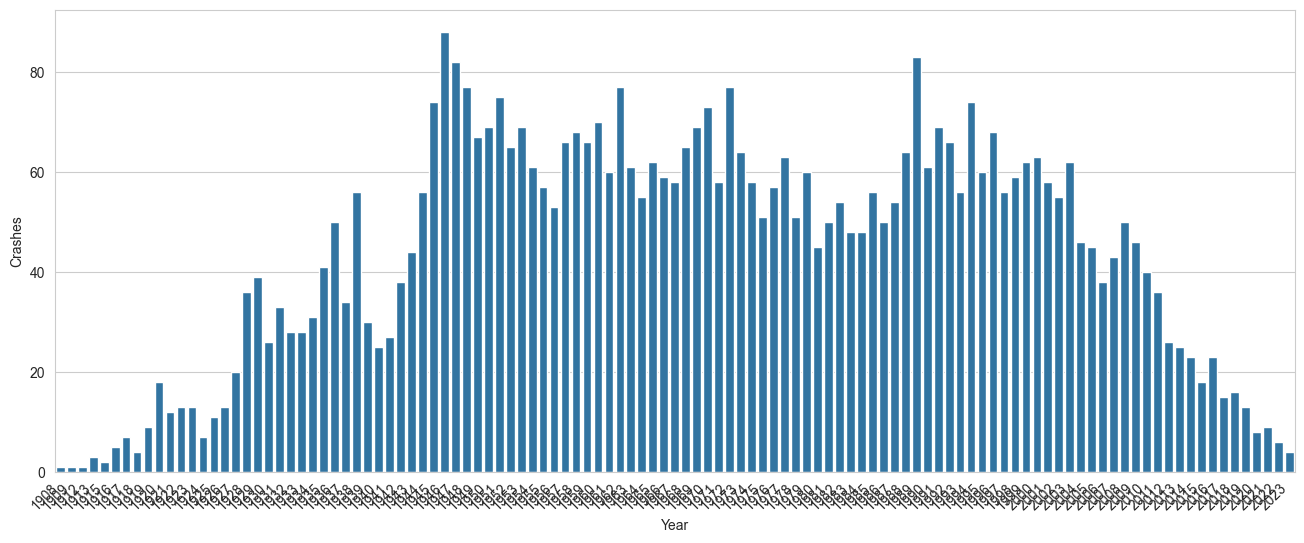

In [156]:
# Analyze the Frequency of Crashes Over Time
# Create New Column For Year of Crash
df['Year'] = df['Date'].dt.year

# Use Seaborn Countplot to Visualize Trend
plt.figure(figsize=(16,6))
sns.countplot(df, x='Year')
plt.xlabel('Year')
plt.ylabel('Crashes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Statistical Analysis

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

In [157]:
# Drop Rows Where Values Don't Make Sense
df = df.dropna(subset=['Aboard', 'Fatalities'])
df = df[df['Aboard'] > 0]  

# Compute survival rate per crash
df['Survival_Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard']

In [158]:
# Fatalities Statistics
fatal_mean = stats.tmean(df['Fatalities'])
fatal_median = stats.scoreatpercentile(df['Fatalities'], 50)
fatal_std = stats.tstd(df['Fatalities'])

# Survival Rate Statistics
surv_mean = stats.tmean(df['Survival_Rate'])
surv_median = stats.scoreatpercentile(df['Survival_Rate'], 50)
surv_std = stats.tstd(df['Survival_Rate'])


print("Fatalities Statistics:")
print(f"Mean: {fatal_mean:.2f}")
print(f"Median: {fatal_median:.2f}")
print(f"Standard Deviation: {fatal_std:.2f}\n")

print("Survival Rate Statistics:")
print(f"Mean: {surv_mean:.2%}")
print(f"Median: {surv_median:.2%}")
print(f"Standard Deviation: {surv_std:.2%}")

Fatalities Statistics:
Mean: 21.67
Median: 11.00
Standard Deviation: 30.12

Survival Rate Statistics:
Mean: 17.28%
Median: 0.00%
Standard Deviation: 37.35%


# Hypothesis Test

Comparing the average number of fatalities in different decades

In [ ]:
# Create Decade Column
df['Decade'] = (df['Year'] // 10) * 10

# Pick 2 Decades to Compare (With Enough Samples of Each)
fatal_70s = df.loc[df['Decade'] == 1970, 'Fatalities']
fatal_2000s = df.loc[df['Decade'] == 2000, 'Fatalities']
print(len(fatal_70s), len(fatal_2000s))

612 506


- Null Hypothesis: The Average Number of Fatalities per Crash in 70's and 00's are EQUAL
- Alternate Hypothesis: The Average Number of Fatalities per Crash in 70's and 00's are DIFFERENT

In [166]:
# Conduct an 2-Sample T-Test
t_stat, p_value = stats.ttest_ind(fatal_70s, fatal_2000s, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Analyze Result
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in fatalities.")
else:
    print("Fail to reject the null hypothesis: No significant difference detected.")

T-statistic: 4.284
P-value: 0.00002
Reject the null hypothesis: There is a significant difference in fatalities.
